In [118]:
# import packages
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['axes.linewidth'] = 2
rc('font', **{'family':'serif','serif':['Helvetica']})
#rc('text', usetex=True)
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['legend.fontsize'] = 25


In [119]:
# import the data
bikes = pd.read_csv('train.csv', index_col=0, parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<AxesSubplot:xlabel='datetime'>

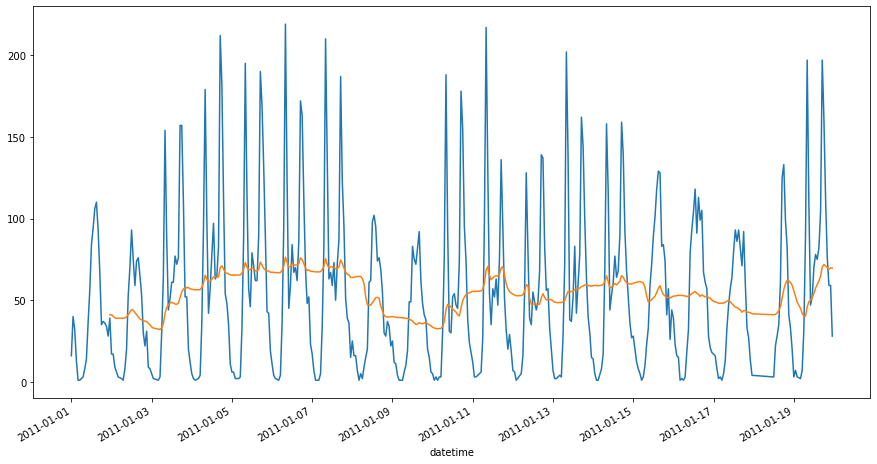

In [5]:
bikes['count']['2011-01'].plot(figsize=(15, 8))
bikes['count']['2011-01'].rolling(24).mean().plot(figsize=(15, 8))

In [6]:
bikes.index.max() - bikes.index.min()

Timedelta('718 days 23:00:00')

In [33]:
# Plot features as a functio of time after sum the times per day
downsampled = bikes.resample('M').mean()
downsampled.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-31,1.0,0.055684,0.612529,1.440835,8.633782,10.767981,56.308585,13.749830,4.658933,49.986079,54.645012
2011-02-28,1.0,0.000000,0.733184,1.378924,11.331076,13.999922,53.580717,15.509298,8.466368,65.174888,73.641256
2011-03-31,1.0,0.000000,0.735426,1.466368,14.063184,16.895594,55.923767,16.033866,17.735426,69.114350,86.849776
2011-04-30,2.0,0.052747,0.630769,1.619780,17.776879,21.239835,66.285714,15.844234,26.876923,84.149451,111.026374
2011-05-31,2.0,0.000000,0.736842,1.528509,21.528596,25.455143,71.421053,12.355358,34.791667,140.017544,174.809211


In [46]:
downsampled.shape[1]
downsampled.columns[0]
downsampled['holiday'].unique

<bound method Series.unique of datetime
2011-01-31    0.055684
2011-02-28    0.000000
2011-03-31    0.000000
2011-04-30    0.052747
2011-05-31    0.000000
2011-06-30    0.000000
2011-07-31    0.052632
2011-08-31    0.000000
2011-09-30    0.052980
2011-10-31    0.052747
2011-11-30    0.052632
2011-12-31    0.000000
2012-01-31    0.103753
2012-02-29    0.000000
2012-03-31    0.000000
2012-04-30    0.052863
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.052632
2012-08-31    0.000000
2012-09-30    0.052632
2012-10-31    0.052632
2012-11-30    0.052747
2012-12-31    0.000000
Freq: M, Name: holiday, dtype: float64>

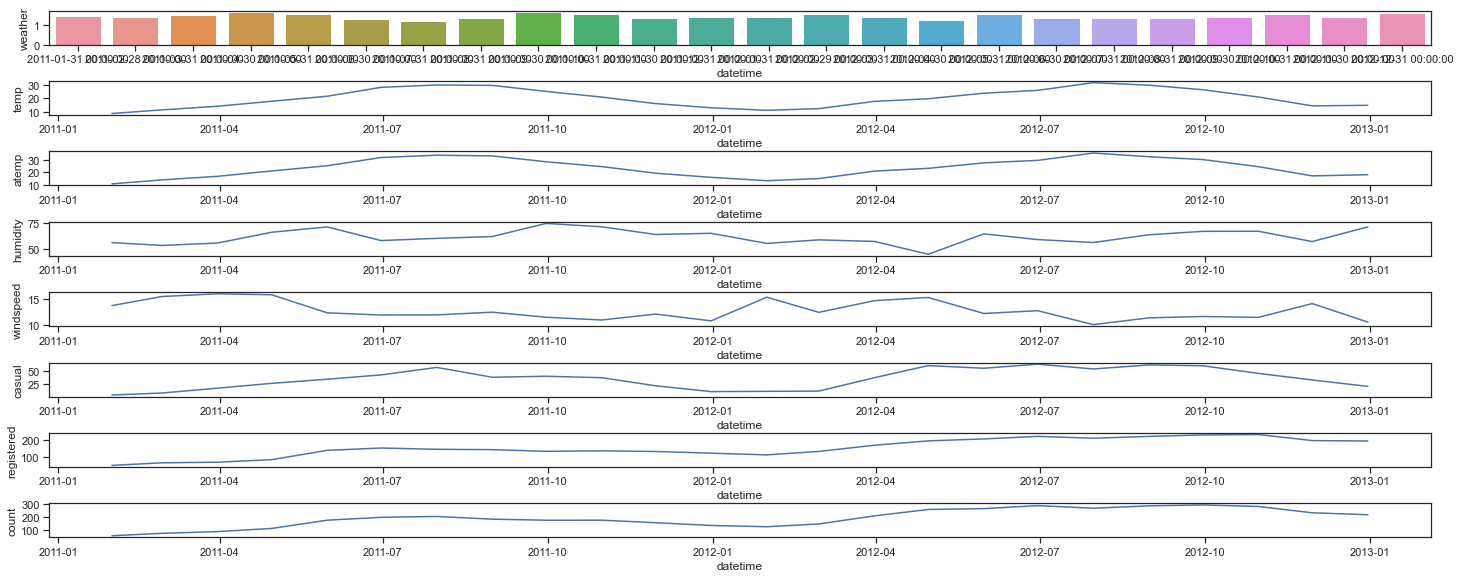

In [74]:


sns.set(style="ticks")
fig, ax = plt.subplots(8)
fig.tight_layout()

g1 = sns.barplot(x=downsampled.index, y = downsampled["weather"],data = downsampled, ax=ax[0])
#g1.set(xlabel ="",ylabel = "Weather", title ='Weather')
g2 = sns.lineplot(x=downsampled.index, y = downsampled["temp"],data = downsampled, ax=ax[1])
g3 = sns.lineplot(x=downsampled.index, y = downsampled["atemp"],data = downsampled, ax=ax[2])
g4 = sns.lineplot(x=downsampled.index, y = downsampled["humidity"],data = downsampled, ax=ax[3])
g5 = sns.lineplot(x=downsampled.index, y = downsampled["windspeed"],data = downsampled, ax=ax[4])
g6 = sns.lineplot(x=downsampled.index, y = downsampled["casual"],data = downsampled, ax=ax[5])
g7 = sns.lineplot(x=downsampled.index, y = downsampled["registered"],data = downsampled, ax=ax[6])
g8 = sns.lineplot(x=downsampled.index, y = downsampled["count"],data = downsampled, ax=ax[7])


In [101]:

downsampled.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.50000,0.028612,0.680776,1.418525,20.187647,23.607418,61.859610,12.808185,35.904496,155.134482,191.038978
std,1.14208,0.030940,0.046254,0.118454,7.011578,7.472106,6.944138,1.812501,19.078378,55.100249,71.135525
min,1.00000,0.000000,0.612529,1.184211,8.633782,10.767981,45.085903,10.079063,4.658933,49.986079,54.645012
25%,1.75000,0.000000,0.631521,1.343202,14.265455,17.148203,57.082747,11.496214,20.257870,130.650219,142.777927
50%,2.50000,0.026316,0.684211,1.381770,20.282815,24.046736,61.285088,12.293956,37.697802,145.196272,189.771930
75%,3.25000,0.052747,0.697582,1.526864,26.056579,29.990277,66.503211,14.283863,54.729167,201.024525,259.119373
max,4.00000,0.103753,0.789474,1.619780,31.715658,35.789134,74.830022,16.033866,63.539474,234.614035,292.598684


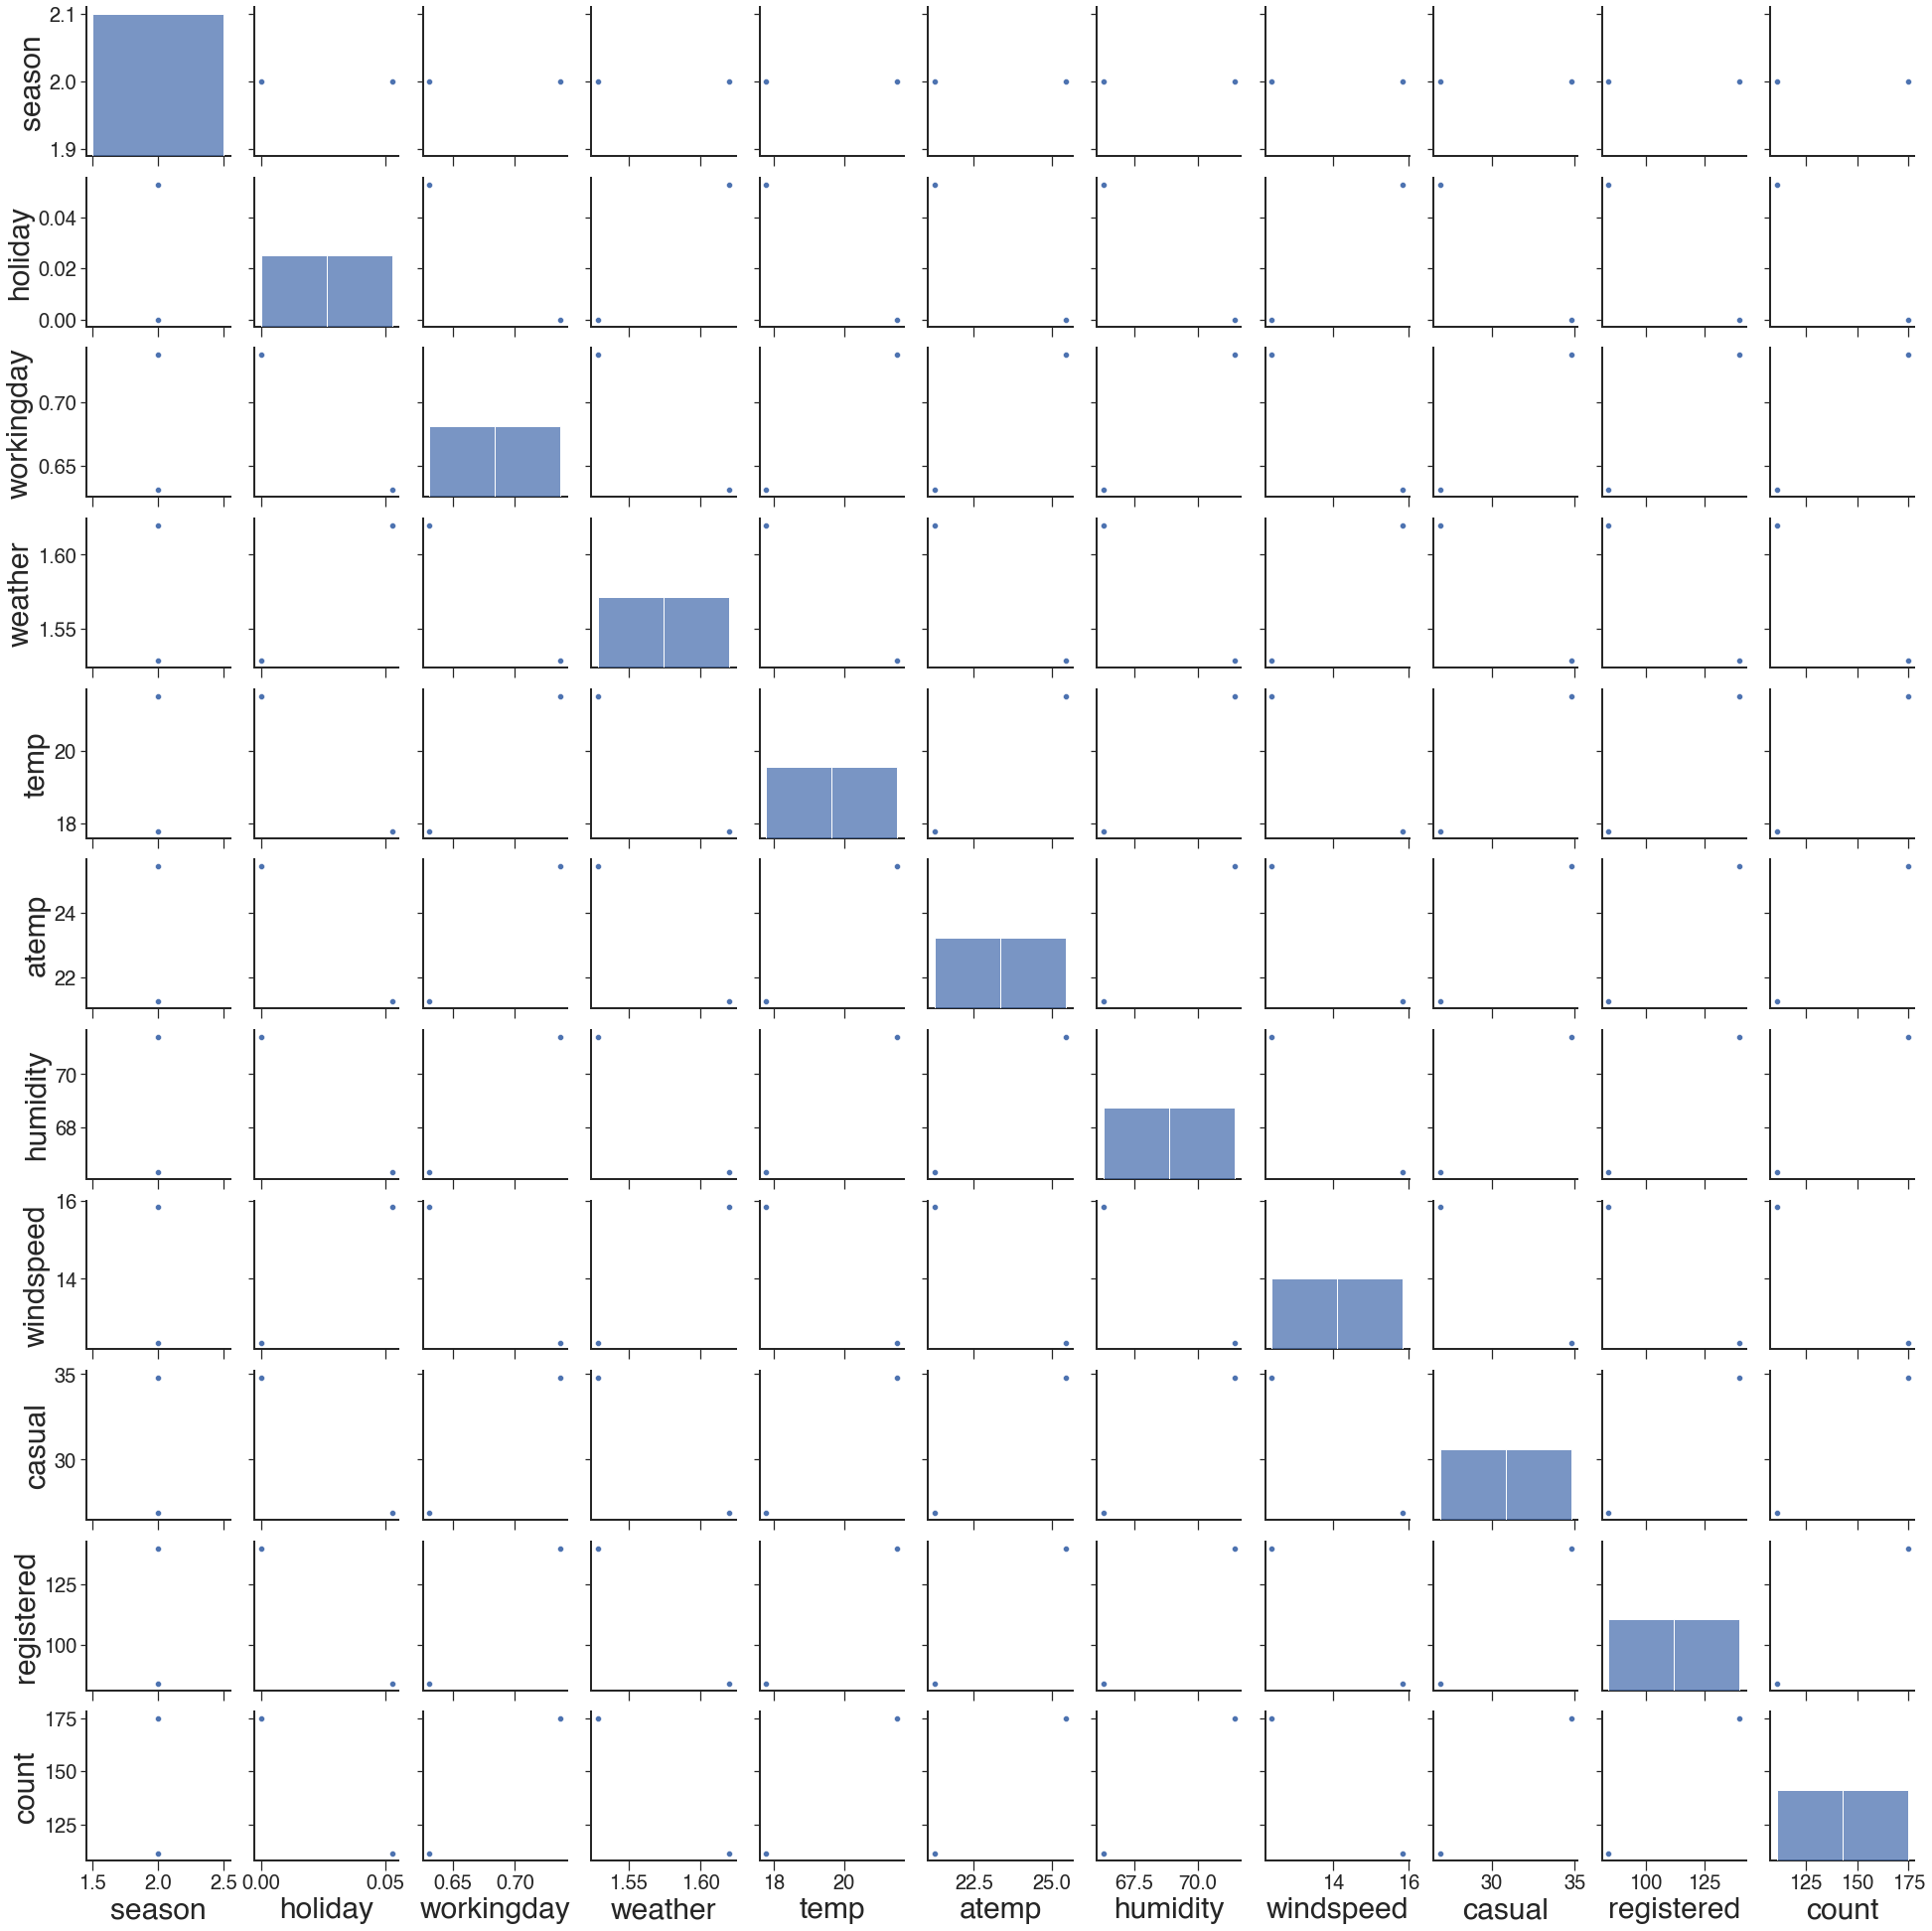

In [98]:
# Basic correlogram for a spcific month
F = downsampled.loc[]
F
sns.pairplot(F) 


# See results per day / week


In [110]:
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
